In [1]:
import pandas as pd
from data_util import bmi_calc, bmi_class_assign, bp_class_assign
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/cardio_train.csv", sep=";")

In [2]:
# feature engineering BMI

df["bmi"] = bmi_calc(df["weight"],df["height"])

df = df[(df["bmi"]>= 15) & (df["bmi"]<=60)] # ta bort outliers

df["bmi class"] = df["bmi"].apply(bmi_class_assign) # kan tycka det borde finnas en under-weight klass men..
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi class
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class II)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,over-weight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,over-weight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,obese (class III)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,obese (class I)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,over-weight


In [3]:

# Feature engineering blodtryck

# ap_hi = systolic
'''
< 120 normal
120-129 elevated
130-139 high, hypertension, stage 1
140-180 high, hypertension, stage 2
> 180 hypertensive crisis
'''
# ap_lo = diastolic
'''
< 80 normal
80-89 high stage 1
90-120 high stage 2
> 120 crisis
'''

df = df[(df["ap_hi"]>= 60 ) & (df["ap_hi"]<=200)]
df = df[(df["ap_lo"]>= 30 ) & (df["ap_lo"]<=200)]


df["blood pressure class"] = df.apply(lambda row: bp_class_assign(row["ap_hi"], row["ap_lo"]), axis=1)

'''efter första iteration hittade en rad 
1010	1402	15355	1	163	76.0	180	100	1	1	0	0	1	1	28.604764951635367	over-weight	missing values'''

df.to_csv("processed_cardio.csv")

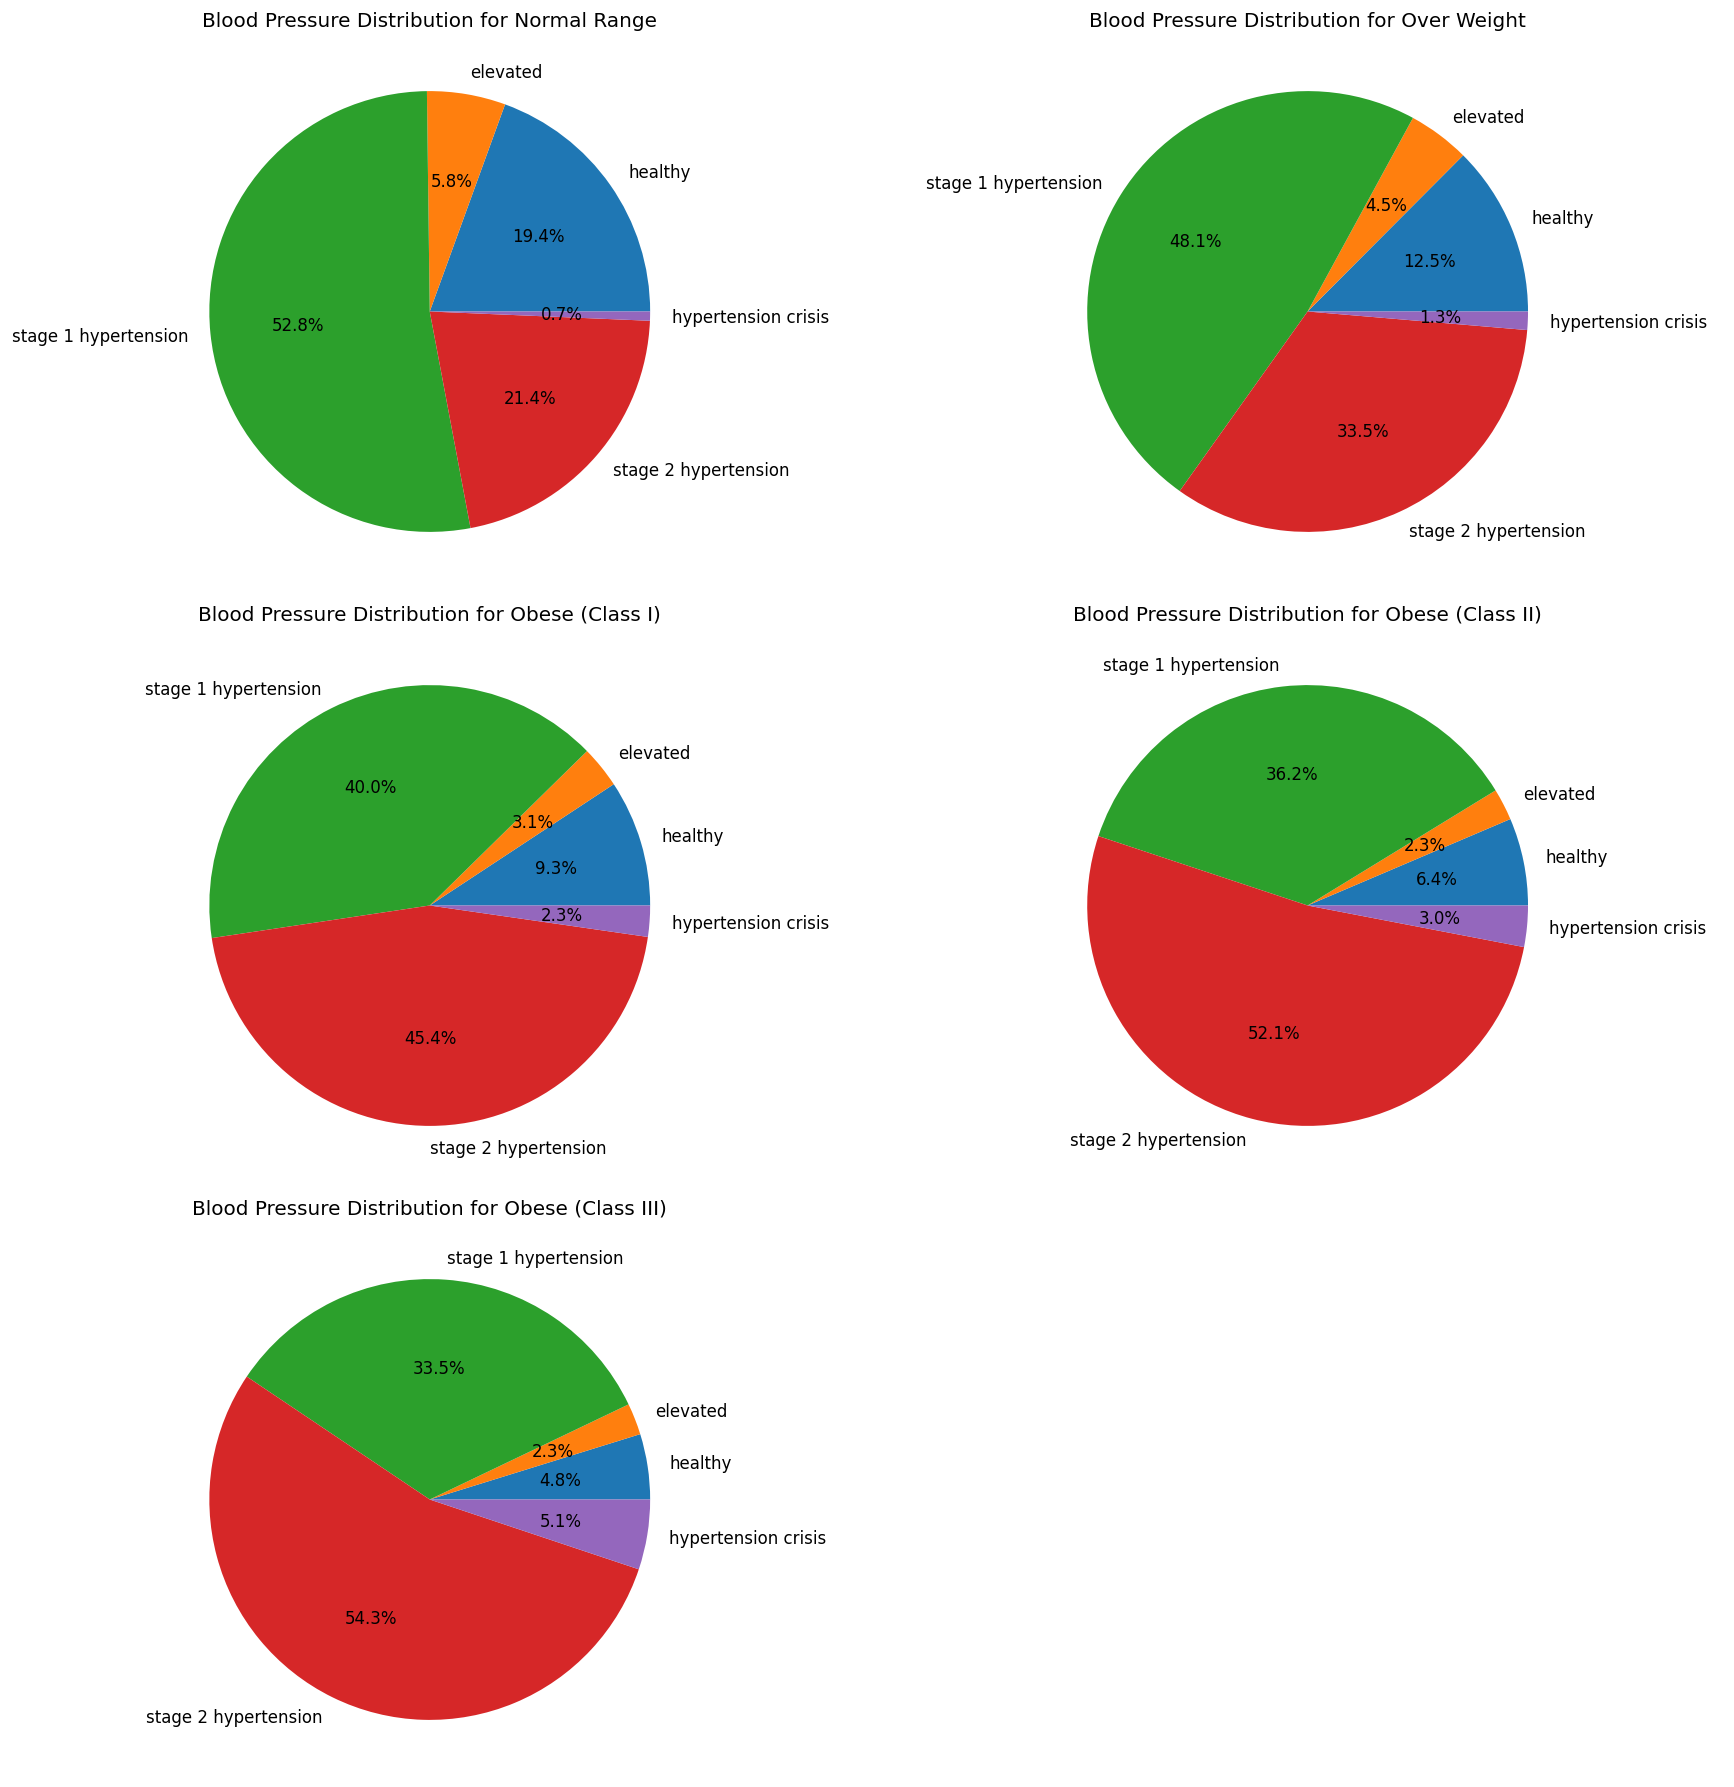